In [1]:
# First, we must import required items, such as pandas and numpy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
InflationRawData = pd.read_csv('inflaatio.csv')
print(InflationRawData.shape)
InflationRawData.head()

(505, 2)


,Time (YYYYMMM),Yearly change (%)
0,1980M01,8.9
1,1980M02,9.3
2,1980M03,9.7
3,1980M04,10.7
4,1980M05,11.6


In [3]:
# Let's change the names to something more reasonable.
InflationRawData.columns = ['Time', 'Rate']
# Turns out, this makes it a lot more reasonable
# Also, let's rename the data. Makes it easier to write.

data = InflationRawData
data.head()

,Time,Rate
0,1980M01,8.9
1,1980M02,9.3
2,1980M03,9.7
3,1980M04,10.7
4,1980M05,11.6


In [4]:
X = np.arange(505).reshape(-1,1)
y = data['Rate'].to_numpy()

print(X.shape)
print(y.shape)
print(X[0])
print(y[0])

(505, 1)
(505,)
[0]
8.9


In [20]:
# Let's fit a linear regression model
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.33)

regr = LinearRegression()
regr.fit(X_train, y_train)
y_train_pred = regr.predict(X_train)
tr_error=mean_squared_error(y_train, y_train_pred)
print("The training error is ", tr_error)

y_val_pred = regr.predict(X_val)
val_error = mean_squared_error(y_val, y_val_pred)
print("The validation error is ", val_error)

The training error is  4.4511157341578915
The validation error is  4.83654825823564


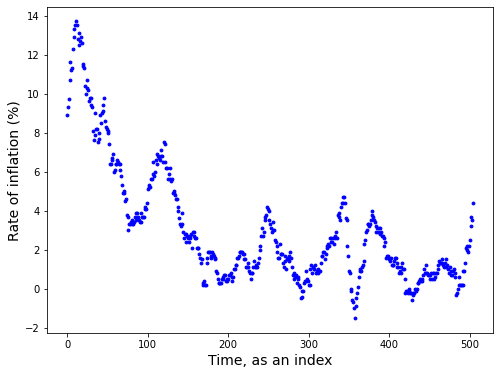

In [17]:
# Let's visualize the data
plt.figure(figsize=(8,6))
plt.scatter(X, y, color='b', s=8, label='datapoints from the dataframe "inflation"')
plt.xlabel('Time, as an index', size=14)
plt.ylabel('Rate of inflation (%)', size=14)
plt.show()

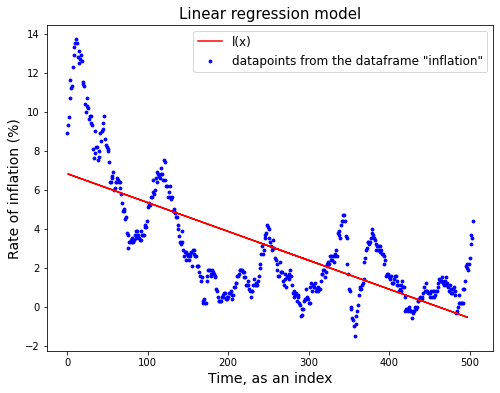

In [33]:
# Add the linear regression line to it
plt.figure(figsize=(8,6))
plt.scatter(X, y, color='b', s=8, label='datapoints from the dataframe "inflation"')
#plot the linear regression method as l(x)
plt.plot(X_val, y_val_pred, color='r', label='l(x)') 
plt.xlabel('Time, as an index', size=14)
plt.ylabel('Rate of inflation (%)', size=14)
plt.title('Linear regression model', size=15)
plt.legend(loc='best',fontsize=12)

plt.show()

In [34]:
endOfYear =np.array((505,506,507,508,509,510,511,512,513,514,515)).reshape(-1,1)
print(regr.predict(endOfYear))

[-0.65867347 -0.67347918 -0.68828489 -0.7030906  -0.71789631 -0.73270202
 -0.74750773 -0.76231344 -0.77711915 -0.79192486 -0.80673057]


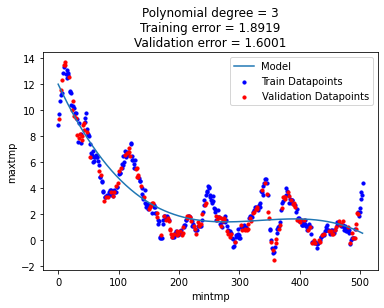

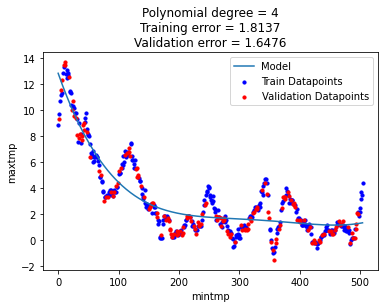

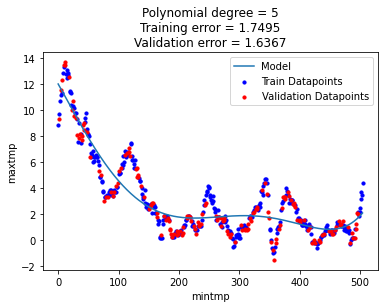

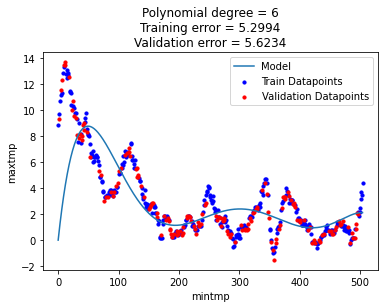

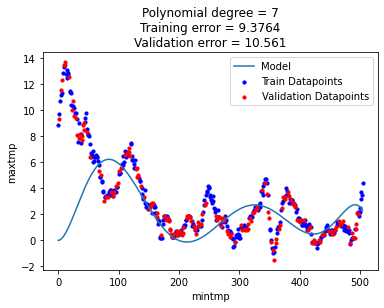

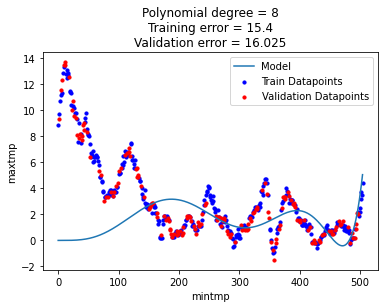

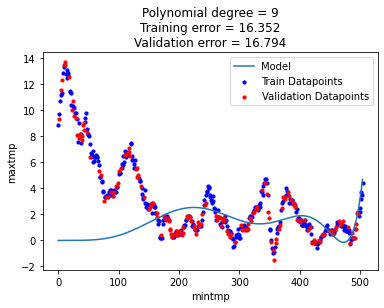

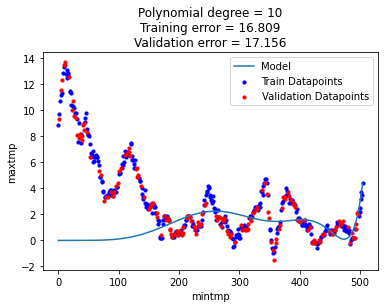

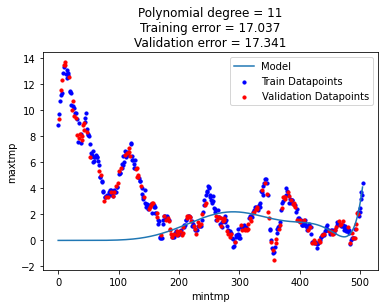

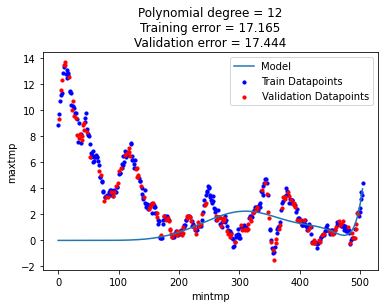

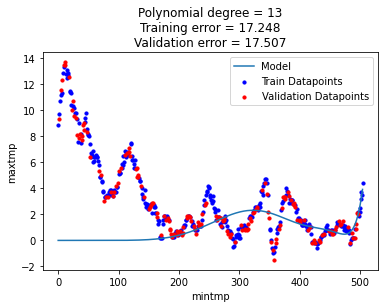

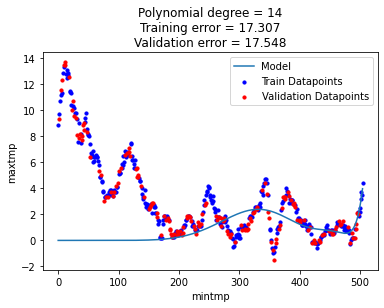

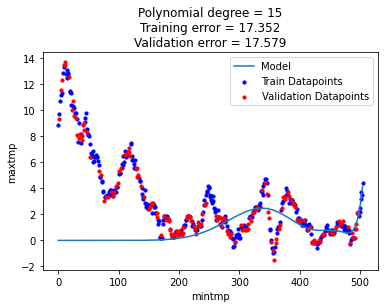

In [41]:
degrees = [3,4,5,6,7,8,9,10,11,12,13,14,15]
tr_errors = []
val_errors = []

for i in range(len(degrees)):
    
    lin_regr = LinearRegression(fit_intercept=False)
    poly = PolynomialFeatures(degree = degrees[i])
    X_train_poly = poly.fit_transform(X_train)
    lin_regr.fit(X_train_poly, y_train)
    
    y_pred_train = lin_regr.predict(X_train_poly)
    tr_error = mean_squared_error(y_train, y_pred_train)
    
    X_val_poly = poly.fit_transform(X_val)
    y_pred_val = lin_regr.predict(X_val_poly)
    val_error = mean_squared_error(y_val, y_pred_val)
    tr_errors.append(tr_error)
    val_errors.append(val_error)
    
    plt.tight_layout()
    plt.plot(X, lin_regr.predict(poly.transform(X.reshape(-1, 1))), label="Model")    # plot the polynomial regression model
    plt.scatter(X_train, y_train, color="b", s=10, label="Train Datapoints")    # plot a scatter plot of y(maxtmp) vs. X(mintmp) with color 'blue' and size '10'
    plt.scatter(X_val, y_val, color="r", s=10, label="Validation Datapoints")    # do the same for validation data with color 'red'
    plt.xlabel('mintmp')    # set the label for the x/y-axis
    plt.ylabel('maxtmp')
    plt.legend(loc="best")    # set the location of the legend
    plt.title(f'Polynomial degree = {degrees[i]}\nTraining error = {tr_error:.5}\nValidation error = {val_error:.5}')    # set the title
    plt.show()    # show the plot


In [28]:
print(tr_errors)
print(val_errors)

[1.891863600133158, 1.813738417682808, 1.7494842837263234, 5.299439377243123, 9.37639038294821, 15.400064440358895, 16.35239758974275, 16.808717451008622, 17.036552084489774, 17.164855275816468, 17.24770968272754, 17.307003286907225, 17.35234663906161]
[1.6000614869535161, 1.647611483176236, 1.6367494268057652, 5.623422654282923, 10.56141999040882, 16.02499350787644, 16.793874215210828, 17.1563533000779, 17.341073109043485, 17.444242550419304, 17.50691237575327, 17.548224538352844, 17.578964608742055]


In [32]:
lin_regr=LinearRegression(fit_intercept=False)
poly = PolynomialFeatures(degree=5)
X_train_poly = poly.fit_transform(X_train)
lin_regr.fit(X_train_poly, y_train)
endOfYear_transformed = poly.fit_transform(endOfYear)

print(lin_regr.predict(endOfYear_transformed))


[2.16357763 2.22154325 2.28115015 2.34242366 2.40538929 2.4700728
 2.53650015 2.60469752 2.6746913  2.7465081  2.82017476]


In [35]:
lin_regr=LinearRegression(fit_intercept=False)
poly = PolynomialFeatures(degree=3)
X_train_poly = poly.fit_transform(X_train)
lin_regr.fit(X_train_poly, y_train)
endOfYear_transformed = poly.fit_transform(endOfYear)

print(lin_regr.predict(endOfYear_transformed))

[0.52963605 0.5057151  0.48147834 0.45692391 0.43204998 0.40685471
 0.38133626 0.35549279 0.32932245 0.30282341 0.27599381]
